# S03 T01: Visualització gràfica d'un dataset

#### David Arroyo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fligths_df = pd.read_csv ('DelayedFligths/DelayedFlights.csv')

In [3]:
fligths_df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [6]:
fligths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [5]:
fligths_df.isnull().sum()

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [7]:
'''
Eliminamos algunas columnas que no utilizaremos para la visualización.

En general platearemos los siguientes gráficos:

- Variable categórica: Barras - Vuelos realizados por aerolinea
- Variable numérica: Histograma - Distribución de Retrasos en la llegada de los vuelos
- Variable numérica / Variable categórica: Grafico de Barras - Vuelos retrasados por aerolinea
- Dos variables numéricas : Scatter plot - Rtrasos en la salida vs Retrasos en la llegada
- Tres variables : Stacked Area - Vuelos realizados y vuelos retrasados en la salida por cada aerolinea
- 

'''


usefull_fligth_df = fligths_df.drop(labels=['Unnamed: 0','Year','CRSDepTime', 'ArrTime','CRSArrTime','FlightNum','TailNum','ActualElapsedTime',
                                          'CRSElapsedTime','Dest','Distance','TaxiIn','TaxiOut','CancellationCode',
                                          'Diverted','CarrierDelay','WeatherDelay','NASDelay', 'SecurityDelay','LateAircraftDelay'], axis = 1)

print(usefull_fligth_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Month          int64  
 1   DayofMonth     int64  
 2   DayOfWeek      int64  
 3   DepTime        float64
 4   UniqueCarrier  object 
 5   AirTime        float64
 6   ArrDelay       float64
 7   DepDelay       float64
 8   Origin         object 
 9   Cancelled      int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 147.8+ MB
None


In [8]:
# Vemos que la columna de ArrDelay tiene valores nulos, por lo que hay que trabajarlos antes de pasar al gráfico

usefull_fligth_df.isnull().sum()

Month               0
DayofMonth          0
DayOfWeek           0
DepTime             0
UniqueCarrier       0
AirTime          8387
ArrDelay         8387
DepDelay            0
Origin              0
Cancelled           0
dtype: int64

In [9]:
# Eliminamos las filas que contienen valores nulos en la columna 'ArrDelay'
usefull_fligth_df = usefull_fligth_df.dropna(subset = ['ArrDelay'])
usefull_fligth_df.isnull().sum()

Month            0
DayofMonth       0
DayOfWeek        0
DepTime          0
UniqueCarrier    0
AirTime          0
ArrDelay         0
DepDelay         0
Origin           0
Cancelled        0
dtype: int64

In [10]:
print(usefull_fligth_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928371 entries, 0 to 1936757
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Month          int64  
 1   DayofMonth     int64  
 2   DayOfWeek      int64  
 3   DepTime        float64
 4   UniqueCarrier  object 
 5   AirTime        float64
 6   ArrDelay       float64
 7   DepDelay       float64
 8   Origin         object 
 9   Cancelled      int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 161.8+ MB
None


In [11]:
# GRAFICO 1 - VUELOS REALIZADOS POR AEROLINEA

aerolineas = usefull_fligth_df['UniqueCarrier'].unique().tolist()


In [12]:
vuelos_aerolinea = []

for i in range (len(aerolineas)):
    vuelos_realizados = int(usefull_fligth_df[(usefull_fligth_df['UniqueCarrier'] == aerolineas[i])].count()['UniqueCarrier'])
    vuelos_aerolinea.append(vuelos_realizados) 


In [13]:
'''
Paso para organizar los datos y que se muestren graficamente de mayor a menor
'''
data = {
    'Airlines' : aerolineas,
    'Fligths' : vuelos_aerolinea}

aerolineas_df = pd.DataFrame (data)

sorted_aerolineas_df = aerolineas_df.sort_values ('Fligths', ascending = False)

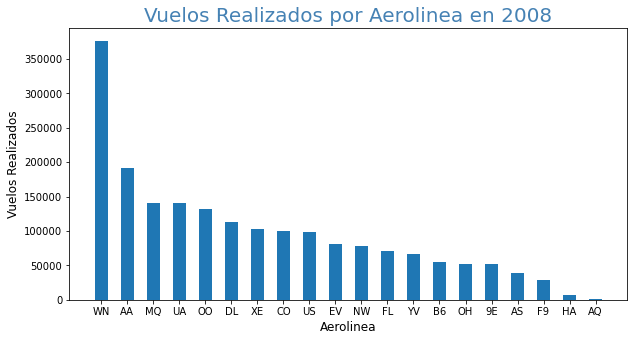

In [29]:
x = sorted_aerolineas_df['Airlines'].tolist()
y = sorted_aerolineas_df['Fligths'].tolist()

plt.figure (figsize = (10,5))
plt.bar(x,y, width = 0.5)

fuente_titulo = {'family' : 'DejaVu Sans', 'color' : 'steelblue', 'size' : 20}
fuente_ejes = {'family' : 'DejaVu Sans', 'color' : 'black', 'size' : 12}

plt.title("Vuelos Realizados por Aerolinea en 2008", fontdict = fuente_titulo)
plt.xlabel("Aerolinea", fontdict = fuente_ejes)
plt.ylabel("Vuelos Realizados", fontdict = fuente_ejes)

plt.show()


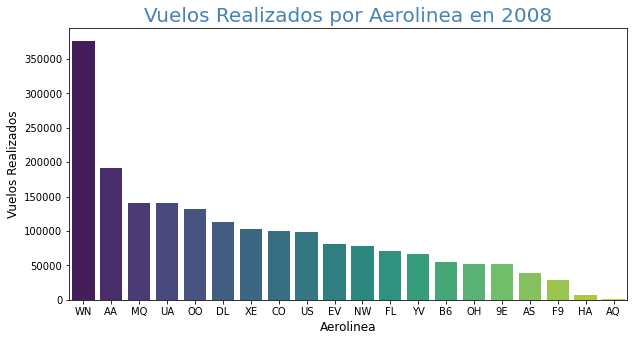

In [40]:
plt.figure (figsize = (10,5))
sns.barplot(data = sorted_aerolineas_df, x = 'Airlines', y = 'Fligths', palette="viridis")

fuente_titulo = {'family' : 'DejaVu Sans', 'color' : 'steelblue', 'size' : 20}
fuente_ejes = {'family' : 'DejaVu Sans', 'color' : 'black', 'size' : 12}

plt.title("Vuelos Realizados por Aerolinea en 2008", fontdict = fuente_titulo)
plt.xlabel("Aerolinea", fontdict = fuente_ejes)
plt.ylabel("Vuelos Realizados", fontdict = fuente_ejes)
plt.savefig('Images/AirlineFligths.png')

In [31]:
# GRAFICO 2 - HISTOGRAMA RETRASO DE VUELOS EN LA LLEGADA

' Un vuelo se considera retrasado si sale o llega 10min mas tarde de la hora prevista'

arrival_Delay = usefull_fligth_df[(usefull_fligth_df['ArrDelay'] > 10)]['ArrDelay']

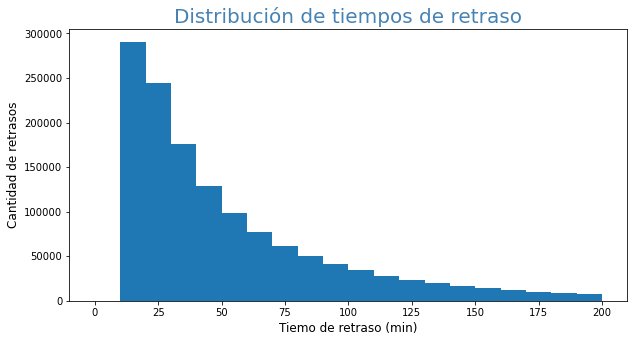

In [32]:
plt.figure (figsize = (10,5))

plt.hist(arrival_Delay, bins = 20, range=[0, 200])

fuente_titulo = {'family' : 'DejaVu Sans', 'color' : 'steelblue', 'size' : 20}
fuente_ejes = {'family' : 'DejaVu Sans', 'color' : 'black', 'size' : 12}

plt.title("Distribución de tiempos de retraso", fontdict = fuente_titulo)
plt.xlabel("Tiemo de retraso (min)", fontdict = fuente_ejes)
plt.ylabel("Cantidad de retrasos", fontdict = fuente_ejes)

plt.show()

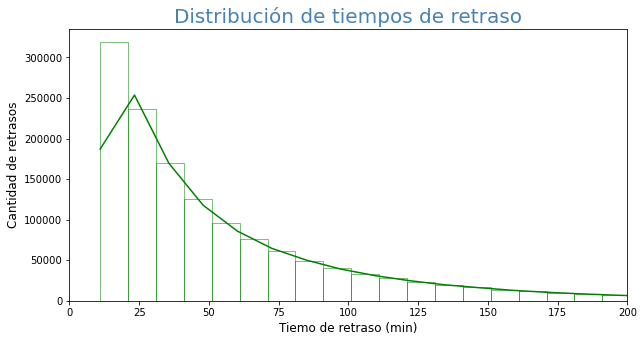

In [41]:
plt.figure (figsize = (10,5))

sns.histplot(data = arrival_Delay,binwidth = 10, fill=False, kde = True, color ="green")

fuente_titulo = {'family' : 'DejaVu Sans', 'color' : 'steelblue', 'size' : 20}
fuente_ejes = {'family' : 'DejaVu Sans', 'color' : 'black', 'size' : 12}

plt.title("Distribución de tiempos de retraso", fontdict = fuente_titulo)
plt.xlabel("Tiemo de retraso (min)", fontdict = fuente_ejes)
plt.ylabel("Cantidad de retrasos", fontdict = fuente_ejes)

plt.xlim (0,200)

plt.savefig('Images/Histogram_Delays.png')

plt.show()

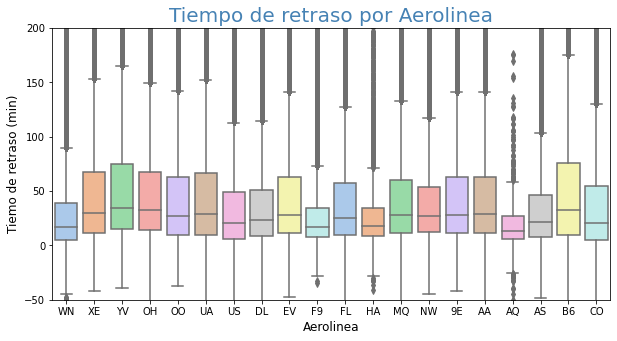

In [42]:
# GRÁFICO 3 - RETRASOS EN LA LLEGADA POR AEROLINEA

plt.figure (figsize = (10,5))

sns.boxplot (data = usefull_fligth_df, x = 'UniqueCarrier' , y = 'ArrDelay', palette="pastel")

fuente_titulo = {'family' : 'DejaVu Sans', 'color' : 'steelblue', 'size' : 20}
fuente_ejes = {'family' : 'DejaVu Sans', 'color' : 'black', 'size' : 12}

plt.title("Tiempo de retraso por Aerolinea", fontdict = fuente_titulo)
plt.xlabel("Aerolinea", fontdict = fuente_ejes)
plt.ylabel("Tiemo de retraso (min)", fontdict = fuente_ejes)

plt.ylim (-50,200)

plt.savefig('Images/Delays_Airlines.png')
plt.show()

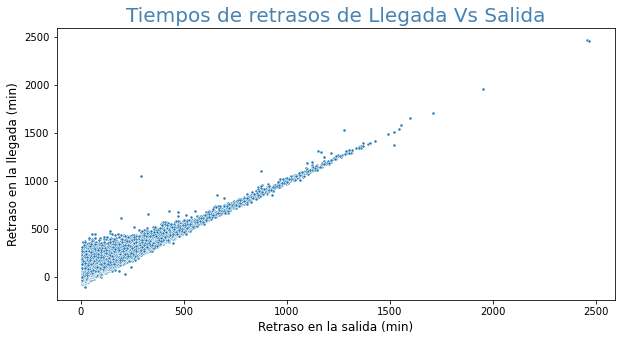

In [43]:
# GRAFICO 4 - RETRASO EN LLEGADAS RESPECTO A RETRASOS EN SALIDAS

plt.figure (figsize = (10,5))

fuente_titulo = {'family' : 'DejaVu Sans', 'color' : 'steelblue', 'size' : 20}
fuente_ejes = {'family' : 'DejaVu Sans', 'color' : 'black', 'size' : 12}

plt.title("Tiempos de retrasos de Llegada Vs Salida", fontdict = fuente_titulo)
plt.xlabel("Retraso en la salida (min)", fontdict = fuente_ejes)
plt.ylabel("Retraso en la llegada (min)", fontdict = fuente_ejes)

sns.scatterplot (data = usefull_fligth_df, x = 'DepDelay', y = 'ArrDelay', marker = '.' )

plt.savefig('Images/Arrivals-Departures_Delays.png')

plt.show()

In [36]:
# GRÁFICO 5 - RETRASO EN LLEGADA Y SALIDA POR AEROLINEA

departur_df = usefull_fligth_df.loc[:,('UniqueCarrier', 'DepDelay')]
departur_df.rename(columns ={'DepDelay': 'Delay'}, inplace = True)
departur_df ['DelayType'] = 'Departure'
arrival_df = usefull_fligth_df.loc[:,('UniqueCarrier', 'ArrDelay')]
arrival_df.rename(columns ={'ArrDelay': 'Delay'}, inplace = True)
arrival_df ['DelayType'] = 'Arrival'

selected_df = departur_df.append (arrival_df)


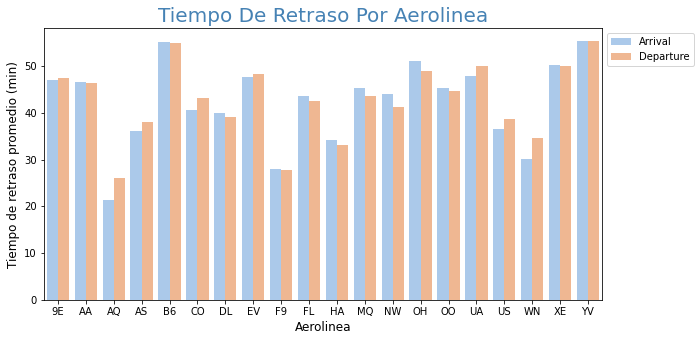

In [45]:

plt.figure (figsize = (10,5))

delay_df = selected_df.groupby(['UniqueCarrier', 'DelayType'], as_index =False).mean()

sns.barplot (data = delay_df, x = 'UniqueCarrier', y = 'Delay', hue = 'DelayType', palette="pastel" )

fuente_titulo = {'family' : 'DejaVu Sans', 'color' : 'steelblue', 'size' : 20}
fuente_ejes = {'family' : 'DejaVu Sans', 'color' : 'black', 'size' : 12}

plt.title("Tiempo De Retraso Por Aerolinea", fontdict = fuente_titulo)
plt.xlabel("Aerolinea", fontdict = fuente_ejes)
plt.ylabel("Tiempo de retraso promedio (min)", fontdict = fuente_ejes)

plt.legend(bbox_to_anchor=(1 , 1), loc='upper left')

plt.savefig('Images/Airline_Arrivals-Departures_Delays.png', bbox_inches= 'tight')

plt.show()

In [38]:
# GRAFICO 6 - Tiempos de retraso y Tiempos de vuelo por aerolinea

final_df = usefull_fligth_df.loc[:,('UniqueCarrier', 'DepDelay', 'ArrDelay', 'AirTime')]
final_df = final_df.groupby(['UniqueCarrier'], as_index =False).mean()
util_df = final_df.set_index ('UniqueCarrier')

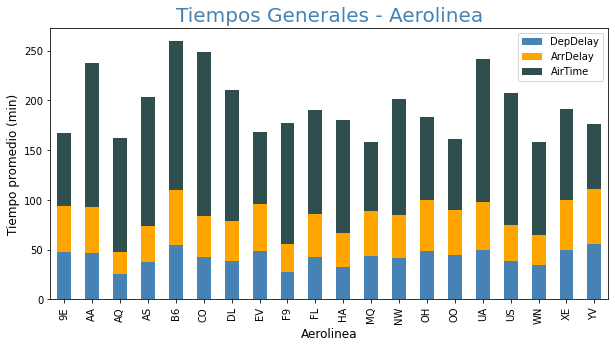

In [46]:
util_df.plot (kind = 'bar', stacked = True, color=['steelblue', 'orange', 'darkslategray'], figsize = (10,5))

fuente_titulo = {'family' : 'DejaVu Sans', 'color' : 'steelblue', 'size' : 20}
fuente_ejes = {'family' : 'DejaVu Sans', 'color' : 'black', 'size' : 12}

plt.title("Tiempos Generales - Aerolinea", fontdict = fuente_titulo)
plt.xlabel("Aerolinea", fontdict = fuente_ejes)
plt.ylabel("Tiempo promedio (min)", fontdict = fuente_ejes)
plt.savefig('Images/Airline_Times.png')

plt.show()